# <font color="#3A40A2">📘 Pipeline completo de Machine Learning aplicado a predicción</font>

En este taller aplicaremos <font color="#0233d6">conceptos de análisis y graficación de datos para la extracción, preparación (normalización, estandarización, manejo de variables categóricas) y fusión de características para entrenar, testear y analizar la performance de modelos de Machine Learning (ML) con el objetivo de predecir el precio de viviendas</font>. El taller será eminentemente práctico, utilizaremos Google Colab para generar gráficas y tablas que nos permitan entender los datos y así obtener indicadores claves para luego aplicar diferentes técnicas de procesamiento y extracción de características antes de entrenar diferentes modelos de ML para compararlos. El taller está dirigido a personas que no tengan experiencia previa en este tipo de problemas, no se requiere conocimientos en programación. El nivel es básico/intermedio.

- Duración: 1 hora
- <font color="#d6023a">**Nivel: Básico**</font>
- Modalidad: Virtual
 
 Taller para el día 8 de octubre de 2025 en la [**Conferencia Internacional: Aplicaciones en Inteligencia Artificial | 2025**](https://sites.google.com/view/cintia-aria/2025/ponentes?authuser=0).


## Disertante

[MSc. BALDEZZARI Lucas](https://www.linkedin.com/in/lucasbaldezzari/)

Lucas BALDEZZARI es Profesor Adjunto de la carrera de Ingeniería [Biomédica de la Universidad Tecnológica](https://utec.edu.uy/es/). Es el fundador y responsable del Laboratorio de Neurociencias e Inteligencia Artificial Aplicada (Neuro-IA LAB) del ITR-SO (Fray Bentos). Es Bioingeniero por la facultad de Ingeniería de la Universidad Nacional de Entre Ríos (UNER, Argentina), posee una Maestría en Ciencia de Datos por la UTEC y el Massachusetts Institute of Technology (MIT), es candidato a Doctor en Ingeniería con mención en Bioingeniería por la UNER. Su tesis doctoral trata sobre el estudio de biomarcadores a partir de electroencefalograma de superficie para la decodificación de trazos de escritura a mano alzada para comunicación alternativa a través de Interfaces Cerebro Computadora (ICC). Sus intereses son el procesamiento avanzado de señales, Machine Learning e Inteligencia Artificial aplicada a Neurociencias, particularmente a las ICCs.

## Colab

Podes acceder al notebook de Google Colab con el código del taller en el siguiente enlace:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/16NwnN7Udh_Jv4jRC_K6TaJ_V86CoFpoX?usp=sharing)

## Fuentes y bibliografía

1. *"Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow. Concepts, Tools and Techniques to build intelligent systems"* - Aurélien Géron.
2. *"Matehmatics for Machine Learning"* - Mar Peter Deisenroth, A. Aldo Faisal, Cheng Soon Ong.
3. [*Repositorio BCIHACK2* - Lucas Baldezzari.](https://github.com/lucasbaldezzari/bcihack2)

In [25]:
## **** CÓDIGO PYTHON ****

## Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
#!git clone https://github.com/lucasbaldezzari/cintia2025.git

##importamos las funciones a usar
try:
    from cintia2025.funciones.cintia2025 import *
except:
    from funciones.cintia2025 import *

# 📊 **<font color="#d6b302">1. Problema a resolver</font>**

Nuestra tarea es predecir el precio de casas dentro de diferentes distritos de California, Estados Unidos. El set de datos cuanta con información acerca de la población por distrito, ingreso medio, precio medio de las casas, entre otras características.

### **<font color="#0205d6">Objetivo</font>**

<p style="text-align: center; color: #0229d6; background-color: #f0f0f0; font-size: 20px; padding: 5px; border: 2px solid black; 
            border-radius: 8px;">
    <b>Predecir el <i>precio medio</i> de las casas en un distrito de California a partir de las características disponibles aplicando validación cruzada y ajuste de hiperparámetros sobre un modelo de regresión</b>
</p>

Nuestro modelo **debe entregar un valor numérico** (*precio medio de las casas*), por lo que se trata de un problema de **regresión**.

Para lograr esto, aplicaremos un pipeline completo de Machine Learning que incluye:
- Análisis exploratorio de datos (EDA)
- Preparación y limpieza de datos
- Extracción y selección de características
- Entrenamiento y evaluación de modelos de Machine Learning
- Optimización de hiperparámetros


### 📚 <font color="#00b351">Conceptos</font>

#### Regresión

La regresión es una técnica de aprendizaje supervisado utilizada para predecir valores continuos. A diferencia de la clasificación, donde el objetivo es asignar una etiqueta a una entrada, en la regresión se busca predecir un valor numérico basado en las características de entrada.

En este ejemplo entrenaremos un modelo de regresión múltiple, dado que usaremos múltiples características (variables independientes) para predecir una variable dependiente (precio medio de las casas). Además, el modelo será univariado, ya que predeciremos una sola variable (precio medio de las casas).

#### <font color="#d62902">Pipeline de Machine Learning</font>

<p style="text-align: center; color: #9fd7ff; background-color: #000000ff; font-size: 18px; padding: 10px;">
    <b> Un <i>pipeline</i> (o <i>tubería</i> 🥴) es una secuencia de componentes o módulos de extracción y procesamiento de datos.</b>
</p>

Los pipelines son comunes en machine learning, ya que suele haber una gran cantidad de datos que manipular y muchas transformaciones que aplicar, y usando un pipeline se puede organizar todo de manera clara y modular.

Cada módulo normalmente se ejecuta de manera asíncrona. Cada componente extrae datos, los procesa y los retorna para ser utilizado en el siguiente módulo, el cual ejecuta su extracción, procesamiento y produce su propia salida.

Cada módulo dentro del pipeline es bastante autónomo. Esto hace que el sistema sea fácil de comprender (por ejemplo, con la ayuda de un gráfico de flujo de datos) y permite que distintos equipos se concentren en diferentes componentes.

**Un requisito importante es que cada componente acepte la entrada y produzca la salida en el formato esperado.**

### 📚 <font color="#00b351">Cuantificando el rendimiento del modelo</font>

En todo problema de Machine Learning es fundamental contar con métricas que nos permitan cuantificar el rendimiento del modelo. Existen múltiples métricas, algunas son ampliamente utilizadas o generales, otras son específicas para ciertos tipos de problemas. En última instancia, la elección de la métrica dependerá del problema a resolver. En un problema de clasificación, por ejemplo, se suelen utilizar métricas como la exactitud (accuracy), precisión (precision), recall (sensibilidad) y F1-score. En problemas de regresión, en cambio, se suelen utilizar métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R²).

En este caso usaremos la *root mean squared error* (RMSE). El RMSE mide la diferencia entre los valores predichos por el modelo y los valores reales, y se calcula como la raíz cuadrada del promedio de los errores al cuadrado, es decir,

$$ RMSE(X,h) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (h(x_{i}) - y_{i})^{2}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_{i} - y_{i})^{2}} $$

Donde,

- $n$ es el número de muestras
- $y_{i}$ es el valor real de la muestra $i$
- $\hat{y}_{i}$ es el valor predicho por el modelo para la muestra $i$ a partir de aplicar la función $h(x_{i})$
- $h(x_{i})$ es la función que representa el modelo entrenado, que toma como entrada las características de la muestra $x_{i}$ y devuelve la predicción $\hat{y}_{i}$
- $h$ es la *función de predicción*, también conocida como *hipótesis*.- $x_{i}$ es la característica de la muestra $i$.
- $X$ es el conjunto de datos de entrada.
- RMSE es la *función de costo* que queremos minimizar.

El término $(\hat{y}_{i} - y_{i})$ se conoce como error o residuo, y representa la diferencia entre el valor real y el valor predicho por el modelo. Al elevar al cuadrado los errores, se penalizan más los errores grandes, lo que hace que el RMSE sea sensible a valores atípicos (outliers).

El RMSE <font color="#5100b3">**mide la distancia entre dos vectores: el vector de predicciones y el vector de valores reales**</font>. El RMSE se expresa en las mismas unidades que la variable objetivo, lo que facilita su interpretación. Por otror lado, el RMSE es la norma L2 del vector de errores. Existen otras métricas basadas en normas, como el MAE (norma L1) y el MSE (norma L2 al cuadrado).

Un RMSE más bajo indica un mejor rendimiento del modelo, ya que significa que las predicciones están más cerca de los valores reales. Un RMSE de 0 indica que el modelo predice perfectamente todos los valores.

### 📊 **<font color="#d6b302">1.1 Cargando datos </font>**

Vamos a comenzar cargando los datos y explorándolos un poco para entender su estructura y contenido.

In [26]:
raw_data = load_housing_data()
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


Cada fila representa un distrito. Podemos ver que tenemos 10 columnas o *características*.

Hemos cargado los datos en un DataFrame de pandas llamado `raw_data`, podemos usar el método *inufo()* para ver el tipo de datos y si hay valores nulos.

In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Tenemos $20640$ filas y 10 columnas.
- Todos los valores son numéricos, a excepción de la columna *ocean_proximity* que es de otro tipo, de hecho es un *string*.

**IMPORTANTE**: <font color="#d60210">La columna *total_bedrooms* tiene $20433$ valores no nulos, por lo que tiene $207$ valores faltantes</font>. Por lo tanto, deberemos tratar estos valores antes de entrenar nuestro modelo.  Veremos esto más adelante.

### 📊 **<font color="#d6b302">1.2 Resumen de nuestrros datos</font>**

Podemos usar el método *describe()* para obtener un resumen estadístico de las columnas numéricas del DataFrame.

In [28]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


### 📊 **<font color="#d6b302">1.3 Analizando cómo se distribuyen los datos</font>**

Ahora vamos a generar histogramas para ver cómo se distribuyen los datos en cada columna numérica.

--- ❓ ---

- ¿Qué cosas podemos observar en los histogramas? ¿Hay alguna característica que te llame la atención?
- ¿Qué podemos decir de los rangos de valores? ¿Es importante tener en cuenta esto a la hora de entrenar un modelo de Machine Learning?

--- ❓ ---

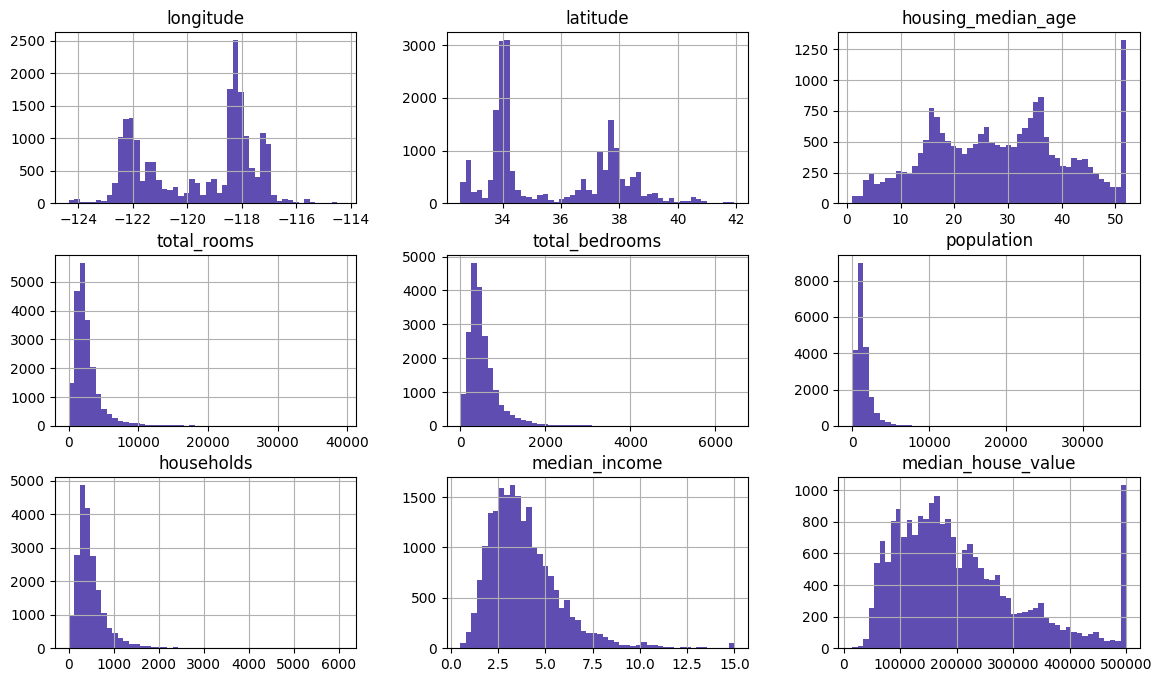

In [29]:
plot_histograms(raw_data, figsize=(14, 8), bins=50, color="#5f4db1")

**Comentarios sobre los histogramas**:

- La variable *median_income* al parecer ha sido escalada, ya que sus valores van de 0 a 15 aproximadamente. Esto es importante tenerlo en cuenta a la hora de entrenar un modelo, ya que si las variables tienen rangos muy diferentes, el modelo puede tener dificultades para aprender. Según los datos oficiales, el ingreso medio ha sido escalado dividiéndolo por 10000, por lo que un valor de 5 en esta columna corresponde a un ingreso medio de $50,000.
- Los datos dentro de *housing_median_age* también parecen estar escalados.
- **Diferentes escalas**: Las características poseen muy diferentes escalas. Esto es importante tenerlo en cuenta a la hora de entrenar un modelo, ya que si las variables tienen rangos muy diferentes, el modelo puede tener dificultades para aprender correctamente -podríamos generar sesgos-.
- Forma de los histogramas: Muchas de las características tienen una distribución sesgada a la derecha (positivamente sesgada), lo que significa que la mayoría de los valores están concentrados en el extremo inferior del rango, con una cola que se extiende hacia valores más altos. Esto puede afectar el rendimiento de algunos modelos de machine learning, especialmente aquellos que asumen una distribución normal de los datos. En estos casos, puede ser útil aplicar transformaciones a las características para hacer que su distribución sea más simétrica.

## 📊 **<font color="#d6b302">2. Creando nuestro set *de testeo*</font>**

Tal vez, uno de los pasos más importantes en cualquier proyecto de Machine Learning es la creación del set de testeo. Este set nos <span style="color:#FFD700; background-color:#6b007c;">permitirá evaluar el rendimiento de nuestro modelo en datos que no ha visto durante el entrenamiento, lo que nos dará una idea más realista de cómo se comportará el modelo en el mundo real</span>.

Hay muchas cosas a tener en cuenta, por ejemplo:

- **La proporción de datos de entrenamiento y test**: Es importante asegurarse de que el set de testeo sea lo suficientemente grande como para proporcionar una evaluación confiable del modelo.
- **La representación de las clases**: Si estamos trabajando con un problema de clasificación, debemos asegurarnos de que todas las clases estén representadas en el set de testeo.
- **Selección aleatoria**: Es importante seleccionar los datos de manera aleatoria para evitar sesgos en la evaluación del modelo.
- **Estratificación**: Es importante estratificar los datos para asegurarnos de que la distribución de clases en el set de testeo sea similar a la del conjunto de datos original, fundamentalmente en problemas de clasificación.
- **Datos i.i.d vs temporalmente correlacionados**: En problemas donde los datos tienen una componente temporal (series temporales), es crucial respetar el orden temporal al dividir los datos en conjuntos de entrenamiento y prueba. En estos casos, no se debe mezclar datos futuros con datos pasados para evitar el "data leakage" (fuga de datos). En lugar de una división aleatoria, se puede utilizar una división basada en el tiempo, donde los datos más antiguos se utilizan para entrenar el modelo y los datos más recientes se utilizan para probarlo.

Y varias cosas más...

Usaremos el método [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de la librería `sklearn.model_selection` de [scikit-learn](https://scikit-learn.org/) para dividir nuestro conjunto de datos en un set de entrenamiento y un set de testeo.

#### **Fijando** la semilla aleatoria

El método posee varias ventajas, entre estas, tiene un argumento llamado `random_state` que permite fijar la semilla para la generación de números aleatorios.

¿Por qué es importante fijar la semilla? 

Fijar la semilla es crucial para garantizar la reproducibilidad de nuestros experimentos o pruebas. Cuando dividimos nuestros datos en conjuntos de entrenamiento y prueba, la selección aleatoria de los datos puede llevar a diferentes resultados cada vez que ejecutamos el código y si lo ejecutamos muchas veces, la probabilidad de que el modelo "vea" todos los datos aumenta, y por ende, estaríamos atentando contra la validez de nuestras pruebas. Al establecer una semilla específica, podemos asegurarnos de que la división de los datos sea la misma en cada ejecución, lo que nos permite comparar resultados de manera justa y consistente.

###  <font color="#007c57">Muestra estratificada</font>

La estratificación es una técnica utilizada para asegurar que la distribución de clases en el set de testeo sea representativa de la distribución en el conjunto de datos original. Debido a que en general el proceso de selección de características es aleatorio, **puede ocurrir que obtengamos mayor cantidad de muestras de ciertas características y dejemos de lado otras que pueden indicar patrones importantes en los datos**. La estratificación ayuda a mitigar este problema al garantizar que cada clase o categoría esté representada en el set de testeo en proporción a su presencia en el conjunto de datos original.

#### Eligiendo columna para estratificar

¿Qué podríamos hacer para estratificar los datos en este caso?

Supongamos que luego de analizar y consultar con "expertos", la columna *median_income* es importante para predecir el precio medio de las casas de los distritos. Podríamos estratificar los datos en base a esta columna.

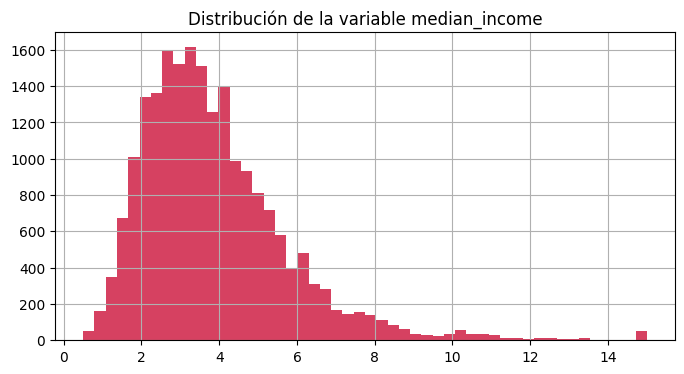

In [30]:
raw_data["median_income"].hist(bins=50, figsize=(8, 4), color="#d64161")
plt.title("Distribución de la variable median_income", fontsize=12)
plt.show()

Como podemos ver, la columna posee valores continuos, por lo que primero debemos convertirla en una variable categórica. Para esto, podemos usar el método `pd.cut()` de pandas para segmentar los datos en diferentes categorías o *bins*.

La mayoría de los valores están entre 0 y 6, aunque tenemos valores por encima de 6 (equivalente a $60.000$ USD). Usaremos 5 categorías o *bins*. Agregaremos una columna llamada *income_cat* al DataFrame `raw_data` que contendrá las categorías.

Veamos.

In [31]:
raw_data["income_cat"] = pd.cut(raw_data["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1, 2, 3, 4, 5])

La función `pd.cut()` segmenta y ordena los valores de la columna *median_income* en bins o categorías. En este caso, hemos definido 5 categorías:
- Categoría 1: ingresos entre 0 y 1.5 (equivalente a $0 a $15,000 USD)
- Categoría 2: ingresos entre 1.5 y 3.0 (equivalente a $15,000 a $30,000 USD)
- Categoría 3: ingresos entre 3.0 y 4.5 (equivalente a $30,000 a $45,000 USD)
- Categoría 4: ingresos entre 4.5 y 6.0 (equivalente a $45,000 a $60,000 USD)
- Categoría 5: ingresos mayores a 6.0 (equivalente a más de $60,000 USD)

Veamos como se ve:

Cantidades por categoría:
income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

Proporciones por categoría:
income_cat
1   0.040
2   0.319
3   0.351
4   0.176
5   0.114
Name: proportion, dtype: float64


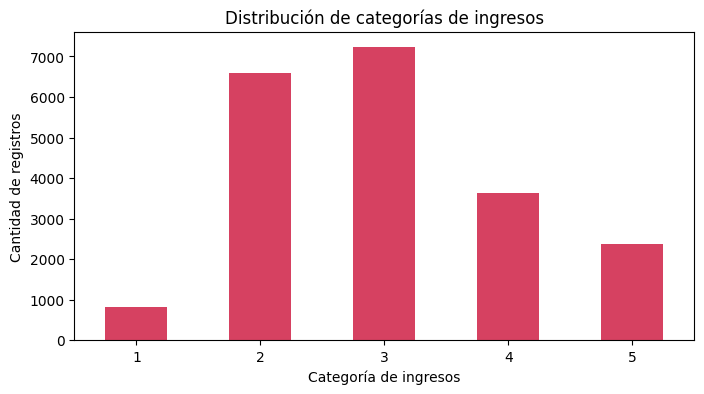

In [32]:
print(f"Cantidades por categoría:\n{raw_data['income_cat'].value_counts().sort_index()}")
print(f"\nProporciones por categoría:\n{raw_data['income_cat'].value_counts(normalize=True).sort_index()}")
##grafico
plt.figure(figsize=(8, 4))
raw_data['income_cat'].value_counts().sort_index().plot(kind='bar',color = "#d64161")
plt.title('Distribución de categorías de ingresos')
plt.xlabel('Categoría de ingresos')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.show()

Analizando las proporciones, podemos ver que hay un **claro desbalance** en las categorías. Por lo tanto, si eligieramos los datos de testeo simplemente al azar, correríamos el riesgo de no representar adecuadamente a las categorías menos frecuentes.

Afortunadamente el método `train_test_split` posee un argumento llamado `stratify` que nos permite estratificar los datos en base a una columna específica. En este caso, usaremos la columna *income_cat* que acabamos de crear.

In [33]:
train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42, stratify=raw_data["income_cat"])

Veamos ahora cómo han quedado las distribuciones de las categorías en los sets de entrenamiento y testeo comparadasd con el set original.

In [34]:
print("*************** Distribución de categorías en el set original ***************")
print(f"Proporciones por categoría:\n{raw_data['income_cat'].value_counts(normalize=True).sort_index()}")
print("*************** Distribución de categorías en el set de entrenamiento ***************")
print(f"Proporciones por categoría:\n{train_set['income_cat'].value_counts(normalize=True).sort_index()}")
print("*************** Distribución de categorías en el set de testeo ***************")
print(f"Proporciones por categoría:\n{test_set['income_cat'].value_counts(normalize=True).sort_index()}")

*************** Distribución de categorías en el set original ***************
Proporciones por categoría:
income_cat
1   0.040
2   0.319
3   0.351
4   0.176
5   0.114
Name: proportion, dtype: float64
*************** Distribución de categorías en el set de entrenamiento ***************
Proporciones por categoría:
income_cat
1   0.040
2   0.319
3   0.351
4   0.176
5   0.114
Name: proportion, dtype: float64
*************** Distribución de categorías en el set de testeo ***************
Proporciones por categoría:
income_cat
1   0.040
2   0.319
3   0.351
4   0.176
5   0.114
Name: proportion, dtype: float64


#### Comparando datos de testeo

Vamos a comparar qué pasa si armamos el set de testeo estratificado vs pure random.

In [35]:
train_test_random, test_set_random = train_test_split(raw_data, test_size=0.2, random_state=42)
print("*************** Distribución de categorías en el set de testeo (random) ***************")
comparar_proporciones(raw_data=raw_data,
                      test_stratificado=test_set,
                      test_purerandom=test_set_random)

*************** Distribución de categorías en el set de testeo (random) ***************


,Conjunto completo %,Estraficado %,Pure random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.980,4.000,4.240,0.360,6.450
2,31.880,31.880,30.740,-0.020,-3.590
3,35.060,35.050,34.520,-0.010,-1.530
4,17.630,17.640,18.410,0.030,4.420
5,11.440,11.430,12.090,-0.080,5.630


In [36]:
##quito las columnas income_cat
for set_ in (train_set, test_set):
    set_.drop("income_cat", axis=1, inplace=True)

---

## 📊 **<font color="#d6b302">3. Exploración y análisis de nuestros datos</font>**

Bien, ahora que hemos generado un set de entrenamiento y otro de testeo, estamos en condiciones de explorar y analizar los datos en mayor profundidad, para esto vamos a 

In [37]:
housing = train_set.copy() ##generamos una copia del set de entrenamiento para trabajar con ella
##y no modificar el set original

#### 📊 **<font color="#d6b302">3.1 Datos geográficos</font>**

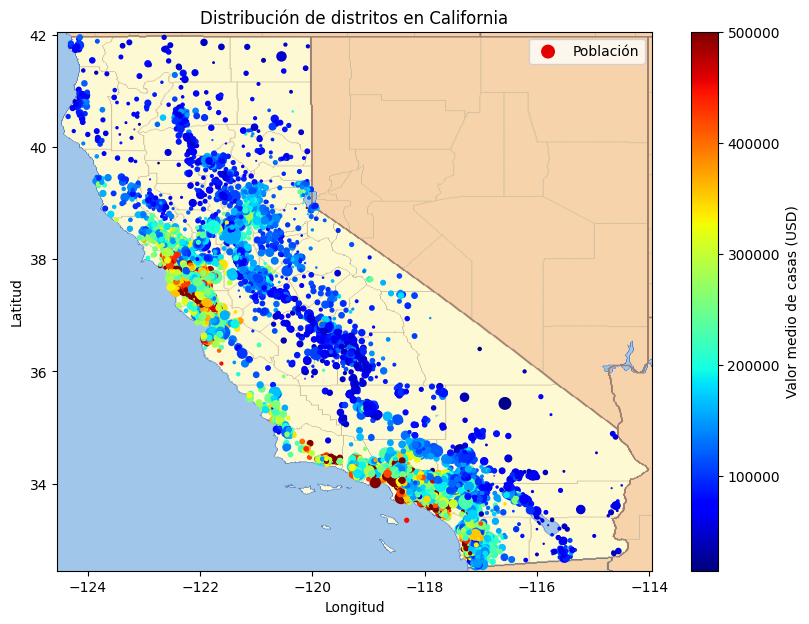

In [38]:
makeHousingScatter(housing,figsize=(10,7))

--- ❓ ---

- ¿Qué podemos decir acerca de los precios de las casas considerando su ubiciación y población por distrito?

--- ❓ ---

#### 📊 **<font color="#d6b302">3.2 Correlaciones entre algunas variables </font>**

Cuando entrenamos modelos de Machine Learning siempre es útil analizar cómo se correlacionan los datos entre sí, o bien con alguna variable en particular.

En este caso, vamos a calcular la correlación de Pearson de las variables numéricas vs *median_house_value*.

In [39]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [40]:
matriz_correlacion = housing.drop(columns=["ocean_proximity"]).corr()
print(matriz_correlacion["median_house_value"].sort_values(ascending=False))

median_house_value    1.000
median_income         0.688
total_rooms           0.137
housing_median_age    0.102
households            0.071
total_bedrooms        0.055
population           -0.020
longitude            -0.051
latitude             -0.140
Name: median_house_value, dtype: float64


También podríamos analizar la correlación entre variables a partir de un gráfico de dispersión.

Veamos.

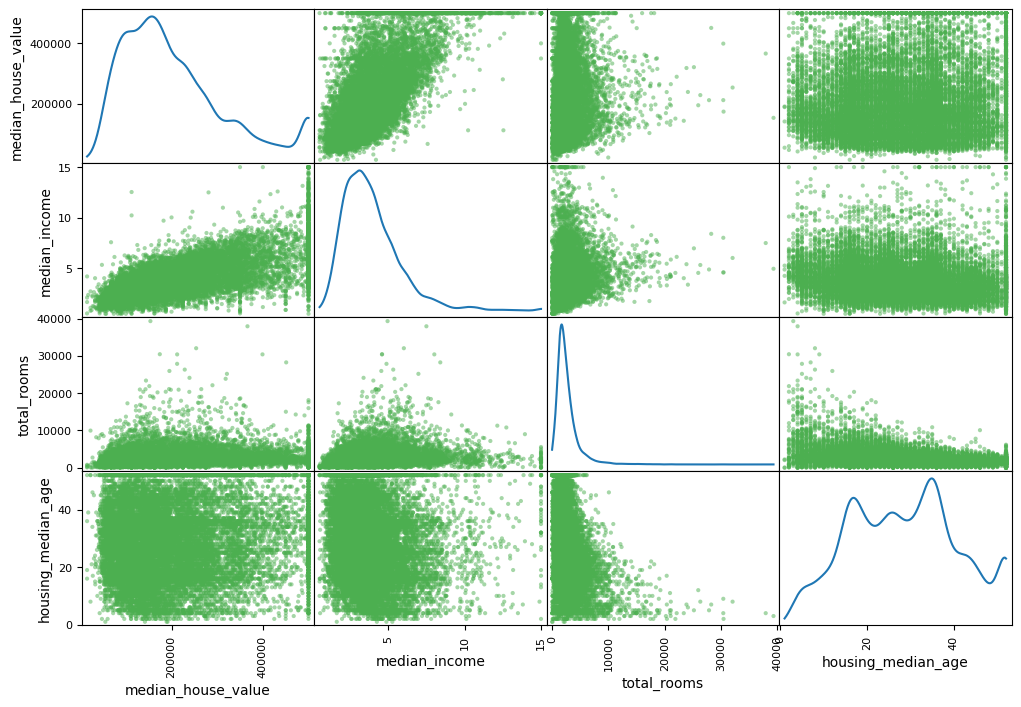

In [41]:
variables = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[variables], figsize=(12, 8), diagonal="kde", color="#4caf50")
plt.show()

Al parecer la variable *median_income* está correlacionada con el precio medio de las casas por distrito.

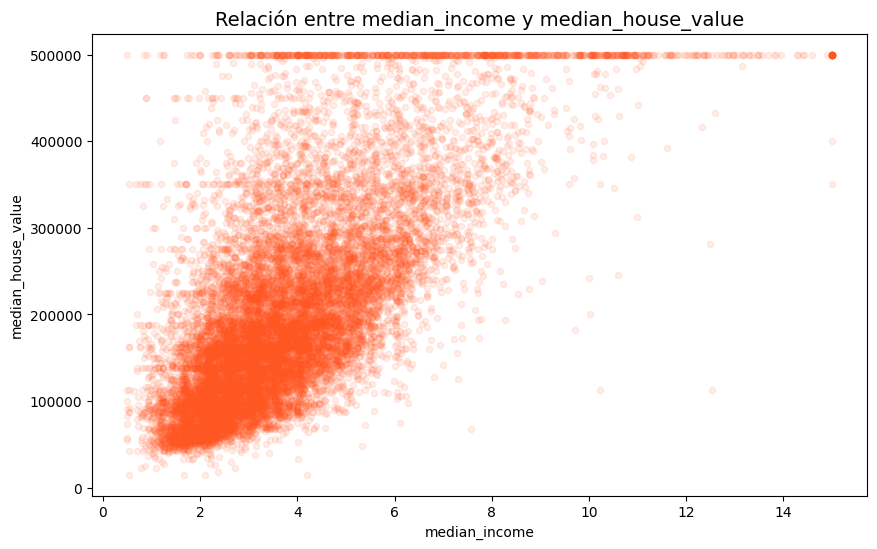

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, color="#ff5722", figsize=(10, 6))
plt.title("Relación entre median_income y median_house_value", fontsize=14)
plt.show()

**Algunos comentarios**

- Hay una fuerte correlación positiva entre el ingreso medio y el precio de las casas por distrito.
- Los datos no están muy dispersos.
- Exixten "líneas horizontales" que debemos considerar dado que el modelo podría aprender estos patrones.

#### 📊 **<font color="#d6b302">3.3 ¿Y si combinamos variables/columnas? </font>**

Es muy común combinar variables. Esto tiene varias ventajas, por mencionar algunas:

- Reducimos redundancia.
- Reduciemos las dimensiones de los datos.
- Podríamos generar combinaciones de variables que mejoren la correlación entre las columnas combinadas y nuestra variable objetivo o target.

Veamos un ejemplo.

In [43]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [44]:
matriz_correlacion = housing.drop(columns=["ocean_proximity"]).corr()
print(matriz_correlacion["median_house_value"].sort_values(ascending=False))

median_house_value    1.000
median_income         0.688
rooms_per_house       0.144
total_rooms           0.137
housing_median_age    0.102
households            0.071
total_bedrooms        0.055
population           -0.020
people_per_house     -0.038
longitude            -0.051
latitude             -0.140
bedrooms_ratio       -0.256
Name: median_house_value, dtype: float64


Matriz de correlación entre las variables numéricas.

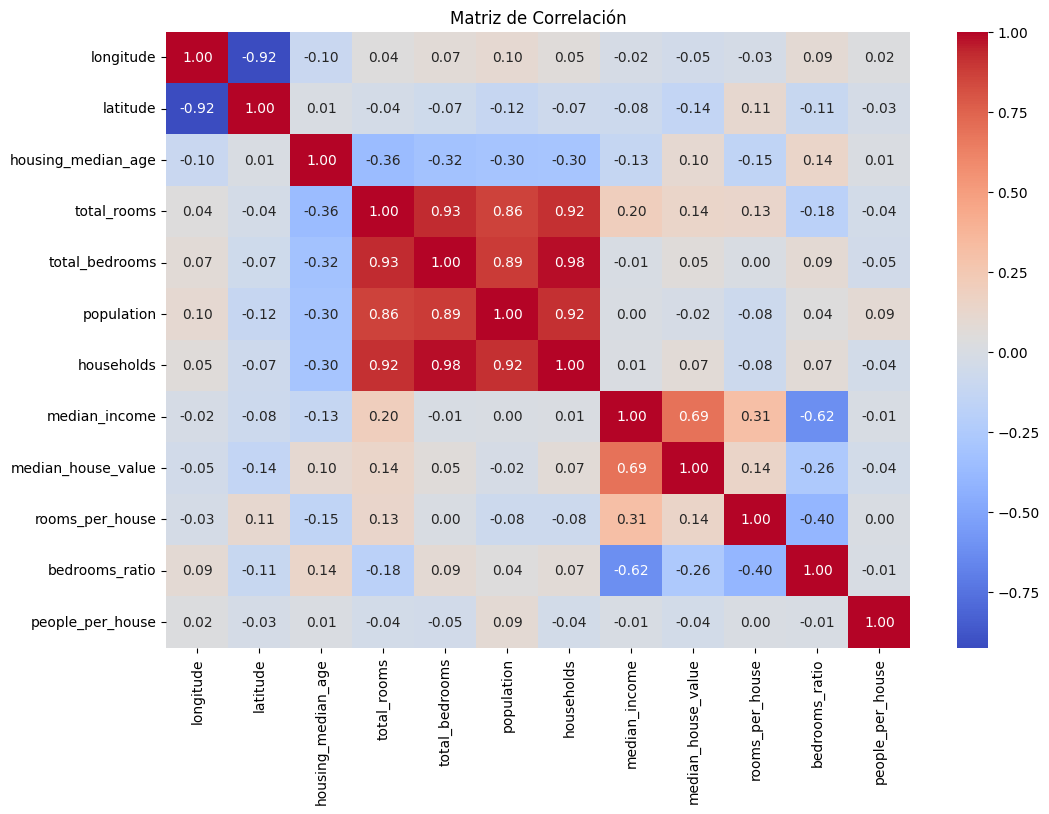

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

#### **<font color="#008667">PCA para reducir dimensiones y redundancia</font>**

Una forma habitual, y muy recomendada para evitar el [*mal de la dimensionalidad*](https://en.wikipedia.org/wiki/Curse_of_dimensionality) es aplicar Principal Component Analysis o PCA.

PCA es un algoritmo del tipo *unsupervised learning* que permite reducir la dimensionalidad de los datos, al mismo tiempo que preserva la mayor cantidad de varianza posible. PCA transforma las características originales en un nuevo conjunto de características, llamadas componentes principales, que son combinaciones lineales de las características originales.

Debemos tener en cuenta que el nuevo espacio generado por PCA puede ser difícil de interpretar, ya que las componentes principales son combinaciones lineales de las características originales. Sin embargo, PCA puede ser muy útil para reducir la dimensionalidad de los datos y mejorar el rendimiento de los modelos de machine learning.

Podes leer más acerca de PCA en el capítulo 10 del libro *"Mathematics for Machine Learning"* - Mar Peter Deisenroth, A. Aldo Faisal, Cheng Soon Ong.

## 📊 **<font color="#d6b302">4. Preparando nuestros datos para entrenar un modelo</font>**

Bien, luego de hacer una análisis exploratorio de los datos, estamos en condiciones de preparar los datos para entrenar un modelo de Machine Learning. Esto incluye:

- **Limpieza de datos**
- **Normalización y estandarización de datos**
- **Manejo de variables categóricas**
- **Selección y extracción de características**

Ahora, bien, estos pasos pueden ser realizados de manera manual, pero es mucho más eficiente y recomendable usar pipelines. En scikit-learn podemos usar la clase `Pipeline` para crear un pipeline de procesamiento de datos.

Antes de esto, aplicaremos los pasos mencionados anteriormente usando las ventajas de la librería de scikit-learn.

In [46]:
## Separando features y variable objetivo
housing = train_set.drop("median_house_value", axis=1) # nos quedamos con las features
housing_labels = train_set["median_house_value"].copy() # y la variable objetivo

#### 📊 **<font color="#d6b302">4.1 Limpieza de datos</font>**

La mayoría de los modelos de Machine Learning no pueden manejar **valores nulos**, por lo que debemos tratarlos antes de entrenar el modelo. Existen varias estrategias para manejar valores nulos:

- Eliminación de filas o columnas con valores nulos: Esta es la estrategia más simple, pero puede llevar a la pérdida de información valiosa si se eliminan demasiadas filas o columnas.
- Imputación de valores: Consiste en reemplazar los valores nulos con un valor estadístico, como la media, mediana o moda de la columna. Esta es una estrategia común y puede ser efectiva si los valores nulos son pocos y aleatorios.
- Predicción de valores: Utiliza un modelo de machine learning para predecir los valores faltantes basándose en otras características del conjunto de datos. Esta estrategia puede ser más precisa, pero también es más compleja y requiere más tiempo.
- Uso de KNN para imputar valores: Utiliza el algoritmo de K-Nearest Neighbors para encontrar los valores más cercanos a la muestra con el valor nulo y utiliza la media o mediana de esos valores para imputar el valor faltante. Esta estrategia puede ser efectiva si los datos tienen una estructura espacial o temporal.

In [47]:
imputador = SimpleImputer(strategy="median")
##sólo podemos aplicar la mediana a columnas numéricas
housing_num = housing.select_dtypes(include=[np.number]) #nos quedamos con las columnas numéricas

##me quedo con las columnas numéricas del set de entrenamiento
nums_cols = housing.select_dtypes(include=[np.number]).columns
# print("Columnas numéricas:", nums_cols.tolist(),end="\n\n")

#"entrenamos" el imputador
imputador.fit(housing_num)
print("**** Medianas encontradas ****")
print(imputador.statistics_,end="\n\n") #medianas de cada columna
cleaned_data = imputador.transform(housing_num)
print("**** Cleaned data *****")
print(cleaned_data.shape)
print(cleaned_data[:2]) #array numpy

**** Medianas encontradas ****
[-118.51    34.26    29.    2125.     434.    1167.     408.       3.538]

**** Cleaned data *****
(16512, 8)
[[-122.42    37.8     52.    3321.    1115.    1576.    1034.       2.099]
 [-118.38    34.14    40.    1965.     354.     666.     357.       6.088]]


#### 📊 **<font color="#d6b302">4.2 Manejo de variables categóricas</font>**

En numersos problemas vamos a encontrarnos con variables categoricas, ya sea porque vienen así en el set de datos o porque decidimos convertir variables numéricas en categóricas (por ejemplo, para estratificar los datos). La mayoría de los modelos de Machine Learning no pueden manejar variables categóricas, por lo que debemos convertirlas en variables numéricas antes de entrenar el modelo. Existen varias técnicas para hacer esto:

- One-hot encoding: Esta técnica crea una nueva columna para cada categoría de la variable categórica, y asigna un valor de 1 a la columna correspondiente a la categoría presente en la muestra, y 0 a las demás columnas. Esta técnica es útil cuando la variable categórica no tiene un orden natural.
- Label encoding: Esta técnica asigna un número entero a cada categoría de la variable categórica. Esta técnica es útil cuando la variable categórica tiene un orden natural.

En este caso, usaremos one-hot encoding para convertir la columna *ocean_proximity* en variables numéricas.

In [48]:
housing_cat = housing[["ocean_proximity"]]
print(housing_cat.head(10))

      ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY
18031       <1H OCEAN
6753        <1H OCEAN


In [49]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(cat_encoder.categories_) #categorías encontradas
housing_cat_1hot.toarray() #matriz dispersa a densa

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

---❓---
¿ Por qué no es conveniente usar Ordinal Encoding en este caso?
---❓---

El método `OrdinalEncoder` de la librería `sklearn.preprocessing` nos asigna un número entero a cada categoría de la variable categórica. Esto implica que se establece un orden entre las categorías, lo cual puede no tener sentido en ciertos casos. Por ejemplo, en la columna *ocean_proximity*, las categorías representan diferentes ubicaciones geográficas y no tienen un orden natural. Si usáramos `OrdinalEncoder`, el modelo podría interpretar que una categoría es "mayor" o "mejor" que otra, lo cual no es correcto y podría llevar a resultados erróneos.

Veamos

In [50]:
ordinal_encoder = OrdinalEncoder()
housing_cat_ordinal = ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder.categories_) #categorías encontradas

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [51]:
print(housing_cat.head(5))
print(housing_cat_ordinal[:5])

      ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
[[3.]
 [0.]
 [1.]
 [1.]
 [4.]]


La categoría 0 y 4 son más parecidas entre sí que la 0 y la 1, por ejemplo. Sin embargo, al usar `OrdinalEncoder`, el modelo podría interpretar que la categoría 4 es "mayor" que la categoría 0, lo cual no tiene sentido en este contexto.

### 📊 **<font color="#0502d6">4.3 Escalamiento y transformaciones</font>**

Una de las cosas más importantes que debemos hacer antes de entrenar un modelo de Machine Learning es escalar y/o transformar los datos. Esto es importante porque muchos modelos de Machine Learning son sensibles a la escala de los datos, **y si las características tienen rangos muy diferentes, el modelo puede tener dificultades para aprender correctamente.**

Existen varias técnicas para escalar y transformar los datos, las más comunes son:
- Min-Max Scaling: Esta técnica escala los datos para que estén en un rango específico, generalmente entre 0 y 1. La fórmula para Min-Max Scaling es:
$$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

- Estandarización (Standardization): Esta técnica transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La fórmula para la estandarización es:
$$ X_{standardized} = \frac{X - \mu}{\sigma} $$

Es importante elegir la técnica de escalado o transformación adecuada según las características de los datos y el modelo que se va a utilizar. En muchos casos, es recomendable probar diferentes técnicas y evaluar su impacto en el rendimiento del modelo.

Acá evitar tanto código, poner más gráficos, tablas y explicar qué se pretende y por qué es importante.

#### La distribución de los datos importa

Muchas técnicas de escalado y transformación asumen que los datos tienen una distribución normal (gaussiana). Si los datos no siguen una distribución normal, estas técnicas pueden no ser efectivas o incluso perjudiciales para el rendimiento del modelo. En estos casos, puede ser útil aplicar transformaciones a las características para hacer que su distribución sea más simétrica.

A modo de ejemplo, la distribución de la variable *population* es muy sesgada a la derecha, lo que puede afectar el rendimiento de algunos modelos de machine learning. Para abordar este problema, podemos aplicar una transformación logarítmica a la variable.

- Transformación logarítmica: Esta técnica aplica la función logarítmica a los datos para reducir la influencia de valores atípicos y hacer que la distribución de los datos sea más simétrica. La fórmula para la transformación logarítmica es:

$$ X_{log} = \log(X + 1) $$

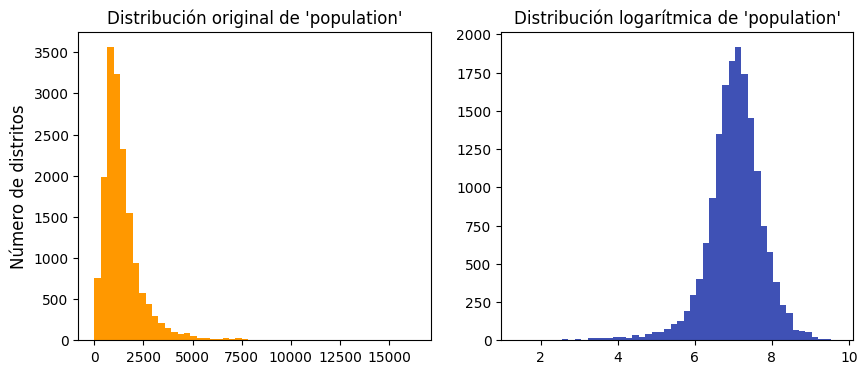

In [52]:
pop_vaues = housing["population"].values.reshape(-1)
log_pop_values = np.log1p(pop_vaues)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(pop_vaues, bins=50, color="#ff9800")
axes[0].set_title("Distribución original de 'population'", fontsize=12)
axes[0].set_ylabel("Número de distritos", fontsize=12)
axes[1].hist(log_pop_values, bins=50, color="#3f51b5")
axes[1].set_title("Distribución logarítmica de 'population'", fontsize=12)
plt.show()

## 📊 **<font color="#0502d6">4.3.1 Creando nuestras propias transformaciones</font>**

Python es un lenguaje del tipo *duck typing*, lo que significa que no es necesario definir el tipo de dato de una variable antes de usarla. Esto nos permite crear nuestras propias transformaciones de manera sencilla.

Scikit-learn nos permite crear nuestras propias transformaciones implementando dos métodos: `fit` y `transform`. El método `fit` se utiliza para aprender los parámetros de la transformación a partir de los datos de entrenamiento, mientras que el método `transform` se utiliza para aplicar la transformación a los datos.

Para esto, usaremos las clases `BaseEstimator` y `TransformerMixin` de la librería `sklearn.base`. La clase `BaseEstimator` nos permite crear un estimador personalizado, mientras que la clase `TransformerMixin` nos proporciona los métodos `fit` y `transform` que necesitamos para crear nuestra propia transformación.

In [53]:
class MiTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, param1=1.0, param2=0.0):
        self.param1 = param1
        self.param2 = param2

    def fit(self, X, y=None):
        # Aquí se pueden aprender los parámetros de la transformación
        return self

    def transform(self, X):
        # Aquí se aplica la transformación a los datos
        return X * self.param1 + self.param2

    def _otroMetodo(self):
        # Aquí se pueden definir otros métodos si es necesario
        pass

    def get_params(self, deep=True):
        # Este método es necesario para que la transformación funcione correctamente en un pipeline
        return {"param1": self.param1, "param2": self.param2}

    def set_params(self, **params):
        # Este método es necesario para que la transformación funcione correctamente en un pipeline
        for key, value in params.items():
            setattr(self, key, value)
        return self

In [54]:
##usando la transformación
transformer = MiTransformer(param1=2.0, param2=3.0)
data = np.array([[1, 2], [3, 4], [5, 6]])
transformed_data = transformer.fit_transform(data)
print("Datos originales:\n", data)
print("Datos transformados:\n", transformed_data)

##usando get_params y set_params
print("Parámetros actuales:", transformer.get_params())
print("Actualizando parámetros...")
transformer.set_params(param1=1, param2=5)

##vemos ahora como es la salida de get_params y set_params
print("Parámetros actualizados:", transformer.get_params())
print("Valores actualizados:\n", transformer.fit_transform(data))

Datos originales:
 [[1 2]
 [3 4]
 [5 6]]
Datos transformados:
 [[ 5.  7.]
 [ 9. 11.]
 [13. 15.]]
Parámetros actuales: {'param1': 2.0, 'param2': 3.0}
Actualizando parámetros...
Parámetros actualizados: {'param1': 1, 'param2': 5}
Valores actualizados:
 [[ 6  7]
 [ 8  9]
 [10 11]]


Podes ver más ejemplos en el repositorio del [Segundo Hackathon de Interfaces Cerebro Computadora](https://github.com/lucasbaldezzari/bcihack2/tree/main) donde se controlaron vehículos en una pista con obstáculos usando señales de EEG y Machine Learning (info [acá](https://utec.edu.uy/es/noticia/la-primera-carrera-de-vehiculos-roboticos-controlados-por-ondas-cerebrales-de-utec-se-hizo-en-una-pista-con-obstaculos/)).

Algunos ejemplos:
- [CSPMulticlass](https://github.com/lucasbaldezzari/bcihack2/blob/main/Desarrollo/PythonScripts/scripts/SignalProcessor/CSPMulticlass.py)
- [FeatureExtractor](https://github.com/lucasbaldezzari/bcihack2/blob/main/Desarrollo/PythonScripts/scripts/SignalProcessor/FeatureExtractor.py)
- [Filter](https://github.com/lucasbaldezzari/bcihack2/blob/main/Desarrollo/PythonScripts/scripts/SignalProcessor/Filter.py)
- [RavelTransformer](https://github.com/lucasbaldezzari/bcihack2/blob/main/Desarrollo/PythonScripts/scripts/SignalProcessor/RavelTransformer.py)

---

## 📊 **<font color="#0285d6">5.0 Usando *Pipelines*</font>**

Como hemos visto, preparar los datos para entrenar un modelo de Machine Learning puede ser un proceso largo y tedioso, que incluye múltiples pasos como limpieza de datos, manejo de variables categóricas, escalado y transformación de datos, entre otros.

Algo que debemos notar, es que los pasos a realizar son secuenciales, es decir, debemos realizar un paso antes de pasar al siguiente. Por ejemplo, no podemos escalar los datos antes de manejar las variables categóricas.

Para simplificar este proceso, podemos usar [*Pipeline*](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de Scikit-Learn, **que nos permiten encadenar múltiples transformaciones y estimadores en un solo objeto**. Esto no solo hace que el código sea más limpio y fácil de entender, sino que también ayuda a evitar errores al asegurarse de que los pasos se realicen en el orden correcto.

Ejemplo de pipeline:

```python
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor())
])
```

Como podemos ver, el constructor de la clase `Pipeline` recibe una lista de tuplas, donde cada tupla contiene un nombre para el paso y el objeto que realiza la transformación o estimación. Podemos usar cualquier nombre para identificar cada paso, pero es recomendable usar nombres descriptivos, además, los nombres no pueden tener doble guión bajo (`__`).

Los pipelines soportan indexación y slicing, lo que nos permite acceder a los pasos individuales del pipeline. Por ejemplo, podemos acceder al primer paso del pipeline usando `pipeline[0]`, o podemos acceder a todos los pasos excepto el último usando `pipeline[:-1]`. También podemos acceder a un paso específico por su nombre usando `pipeline.named_steps["imputer"]`.

Veamos un ejemplo.

In [55]:
pipeline_numerico = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Paso de imputación
    ("standarize", StandardScaler()),  # Paso de estandarización
])

pipeline_numerico

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standarize', StandardScaler())])

In [56]:
pipeline_categorico = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Paso de imputación
    ("onehot", OneHotEncoder(handle_unknown="ignore")),  # Paso de codificación one-hot
])
pipeline_categorico

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [57]:
housing_transformed = pipeline_numerico.fit_transform(housing_num)
housing_transformed[:2]

array([[-1.423,  1.014,  1.861,  0.312,  1.368,  0.137,  1.395, -0.936],
       [ 0.596, -0.702,  0.908, -0.309, -0.436, -0.694, -0.373,  1.172]])

In [58]:
pipeline_numerico[0].fit_transform(housing_num)[:2]

array([[-122.42 ,   37.8  ,   52.   , 3321.   , 1115.   , 1576.   ,
        1034.   ,    2.099],
       [-118.38 ,   34.14 ,   40.   , 1965.   ,  354.   ,  666.   ,
         357.   ,    6.088]])

In [59]:
pipeline_numerico["imputer"].fit_transform(housing_num)[:2]

array([[-122.42 ,   37.8  ,   52.   , 3321.   , 1115.   , 1576.   ,
        1034.   ,    2.099],
       [-118.38 ,   34.14 ,   40.   , 1965.   ,  354.   ,  666.   ,
         357.   ,    6.088]])

In [60]:
pipeline_numerico["standarize"].fit_transform(housing_num)[:2]

array([[-1.423,  1.014,  1.861,  0.312,  1.359,  0.137,  1.395, -0.936],
       [ 0.596, -0.702,  0.908, -0.309, -0.436, -0.694, -0.373,  1.172]])

#### **<font color="#0285d6">📊 5.1 Diferentes transformaciones a las columnas</font>**

La librería `sklearn.compose` nos permite aplicar diferentes transformaciones a diferentes columnas de un DataFrame usando la clase [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). Esto es útil cuando tenemos un conjunto de datos con diferentes tipos de características, como numéricas y categóricas, y queremos aplicar diferentes transformaciones a cada tipo de característica.

Veamos.

In [61]:
variables_numericas = housing.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = housing.select_dtypes(exclude=[np.number]).columns.tolist()
print("Variables numéricas:", variables_numericas)
print("Variables categóricas:", variables_categoricas)

Variables numéricas: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Variables categóricas: ['ocean_proximity']


In [62]:
preprocesamiento = ColumnTransformer([
    ("numerico", pipeline_numerico, variables_numericas),  # Aplicar pipeline
    ("categorico", pipeline_categorico, variables_categoricas),  # Aplicar pipeline
])
preprocesamiento

ColumnTransformer(transformers=[('numerico',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standarize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('categorico',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

El objeto `preprocesamiento` es del tipo `ColumnTransformer` y contiene dos transformaciones, una numérica y otra categórica. La transformación numérica aplica un pipeline específico a las columnas numéricas, mientras que la transformación categórica aplica one-hot encoding a la columna categórica *ocean_proximity*.

Esto es muy potente, ya que nos permite aplicar diferentes transformaciones a diferentes columnas de manera sencilla y eficiente.

#### **<font color="#0285d6">📊 5.3 Testeando el pipeline</font>**

Estamos en condiciones de probar este sencillo pipeline de preprocesamiento.

Veamos.

In [63]:
housing_preprocesado = preprocesamiento.fit_transform(housing)
print(housing_preprocesado.shape)
print(housing_preprocesado[:5])

(16512, 13)
[[-1.423  1.014  1.861  0.312  1.368  0.137  1.395 -0.936  0.     0.
   0.     1.     0.   ]
 [ 0.596 -0.702  0.908 -0.309 -0.436 -0.694 -0.373  1.172  1.     0.
   0.     0.     0.   ]
 [-1.203  1.276  0.351 -0.712 -0.761 -0.789 -0.776 -0.76   0.     1.
   0.     0.     0.   ]
 [ 1.231 -0.885 -0.92   0.702  0.742  0.383  0.731 -0.85   0.     1.
   0.     0.     0.   ]
 [ 0.711 -0.876  0.59   0.79   1.596  0.444  1.755 -0.18   0.     0.
   0.     0.     1.   ]]


In [64]:
preprocesamiento

ColumnTransformer(transformers=[('numerico',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standarize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('categorico',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [65]:
categoric_colums = [f"ocean_proximity_{cat}" for cat in cat_encoder.categories_[0]]
housing_preprocesado_df = pd.DataFrame(housing_preprocesado, columns=variables_numericas + categoric_colums)
##redondeo mean a 2 decimales
housing_preprocesado_df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
longitude,16512.000,-0.000,1.000,-2.388,-1.113,0.531,0.781,2.541
latitude,16512.000,-0.000,1.000,-1.447,-0.801,-0.646,0.976,2.959
housing_median_age,16512.000,-0.000,1.000,-2.191,-0.840,0.034,0.669,1.861
total_rooms,16512.000,-0.000,1.000,-1.207,-0.546,-0.235,0.235,16.786
total_bedrooms,16512.000,0.000,1.000,-1.273,-0.571,-0.246,0.247,13.447
population,16512.000,0.000,1.000,-1.299,-0.583,-0.236,0.274,13.592
households,16512.000,0.000,1.000,-1.303,-0.577,-0.240,0.269,12.689
median_income,16512.000,0.000,1.000,-1.782,-0.691,-0.175,0.465,5.883
ocean_proximity_<1H OCEAN,16512.000,0.441,0.496,0.000,0.000,0.000,1.000,1.000
ocean_proximity_INLAND,16512.000,0.321,0.467,0.000,0.000,0.000,1.000,1.000


**🤟Hemos aplicado exitosamente un breve pero potente pipeline de preprocesamiento a nuestros datos🤟**

Ahora que entendemos la idea básica de los pipelines, podemos crear un pipeline más completo que incluya todas las transformaciones que hemos visto hasta ahora.

### **<font color="#009480">📊 5.4 Creando un pipeline de preprocesamiento completo 🙌</font>**

Bien, vamos a crear un pipeline de preprocesamiento que incluya las siguientes transformaciones:

- Los valores nulos o faltantes serán imputados con la mediana de la columna.
- Las variables categóricas serán manejadas con one-hot encoding.
- Vamos a generar nuevas variables a partir de combinar algunas de las columnas.
- Agregaremos una variable a partir de cuantificar la similitud geográfica entre distritos.
- Aquellas variables con una distribución sesgada serán transformadas con una transformación logarítmica.
- Todas las variables numéricas serán estandarizadas.

In [66]:
full_procesamiento = get_FullProcesamiento()
full_procesamiento

ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                             SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('function_transformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                      func=<function ratio_columnas at 0x000001FEC...
                                                 ('scaler', StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])

Veamos qué obtenemos cuando aplicamos este pipeline a nuestros datos.

In [67]:
housing_procesado = full_procesamiento.fit_transform(housing)

In [68]:
print(f"Forma del dataset procesado: {housing_procesado.shape}")
print(f"Forma del dataset original: {housing.shape}")

Forma del dataset procesado: (16512, 24)
Forma del dataset original: (16512, 9)


In [69]:
housing_procesado[:2]

array([[ 1.847, -0.866, -0.33 ,  1.324,  0.638,  0.457,  1.31 , -1.072,
         0.   ,  0.971,  0.   ,  0.   ,  0.   ,  0.076,  0.001,  0.   ,
         0.131,  0.574,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  1.861],
       [-0.508,  0.025, -0.254, -0.253, -0.064, -0.712, -0.142,  1.195,
         0.118,  0.   ,  0.98 ,  0.028,  0.001,  0.   ,  0.   ,  0.544,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.908]])

Podemos ver que una vez aplicado el pipeline, **obtenemos un array de numpy con 20640 filas y 24 columnas**.

### **<font color="#070094">📊 6.0 Testeando modelos para predicción</font>**

Estamos en condiciones de entrenar un modelo de Machine Learning usando el pipeline de preprocesamiento que hemos creado.

Empecemos con algo sencillo, como un modelo de regresión lineal.

In [70]:
regresor_pipe = Pipeline([
    ("preprocesamiento", full_procesamiento),
    ("regresor", LinearRegression())
])
regresor_pipe

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('function_transformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                                       func=...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                ('regresor', LinearRegression())])

Entrenamos el modelo.

In [71]:
regresor_pipe.fit(housing, housing_labels)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('function_transformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                                       func=...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                ('regresor', LinearRegression())])

#### **<font color="#947100">Testeando el regresor</font>**

Vamos a chequear si nuestro pipeline de preprocesamiento y el modelo funciona.

In [72]:
predicciones_regresor = regresor_pipe.predict(housing)
print(f"Primeras predicciones: {predicciones_regresor[:5]}")
print(f"Primeras etiquetas reales: {housing_labels.iloc[:5].values}")
print(f"Diferencias: {predicciones_regresor[:5] - housing_labels.iloc[:5].values}")

Primeras predicciones: [242761.813 375862.785 127480.983  99355.303 324610.742]
Primeras etiquetas reales: [458300. 483800. 101700.  96100. 361800.]
Diferencias: [-215538.187 -107937.215   25780.983    3255.303  -37189.258]


Podemos ver que el pipeline se entrenó exitosamente y pudo predecir. Ahora bien, algunas predicciones son muy malas 😅.

Analicemos el **RMSE**

In [73]:
regresor_rmse = root_mean_squared_error(housing_labels, predicciones_regresor)
print(f"RMSE del regresor: {regresor_rmse.__round__(2)}")

RMSE del regresor: 68647.96


Bueno, el RMSE es bastante alto (underfitting sobre datos de entrenamiento), lo que indica que el modelo no está funcionando bien. Esto puede deberse a varias razones,

- La calidad de los datos
- Falta de características relevantes o las características no proveen suficiente información para predecir el precio medio de las casas.
- El modelo es demasiado simple para capturar la complejidad del problema.

---❓---
¿Qué podemos hacer para mejorar las predicciones?
---❓---

Tenemos varias opciones, entre estas:

1. Agregar más características o usar técnicas de ingeniería de características para extraer más información de los datos existentes.
2. Probar con **modelos más complejos**.

Probemos el punto 2 usando un [Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [74]:
tree_regressor_pipe = Pipeline([
    ("preprocesamiento", full_procesamiento),
    ("modelo", DecisionTreeRegressor(random_state=42))
])
tree_regressor_pipe

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('function_transformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                                       func=...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                ('modelo', DecisionTreeRegressor(random_state=42))])

In [75]:
tree_regressor_pipe.fit(housing, housing_labels)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('function_transformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                                       func=...
                                                   'households',
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                ('modelo', DecisionTreeRegressor(random_state=42))])

In [76]:
predicciones__tree_regresor = tree_regressor_pipe.predict(housing)
treeregresor_rmse = root_mean_squared_error(housing_labels, predicciones__tree_regresor)
print(f"RMSE del Decision Tree Regressor: {treeregresor_rmse.__round__(2)}")

RMSE del Decision Tree Regressor: 0.0


### **<font color="#940000">¿QUÉ? 🤔</font>**

Al parecer somos muy buenos y logramos un RMSE de 0 en los datos de entrenamiento. Podemos predecir perfectamente todos los valores. **<font color="#940000">¿Esto está bien?</font>**

No, claramente no lo está. Lo que pasa es que estamos evaluando sobre los mismos datos que usamos para entrenar el modelo y esto es un **grave error metodológico**. Esto no debe hacerse porque el modelo ha aprendido a predecir perfectamente los datos de entrenamiento, y seguramente no generalice bien a datos nuevos. Esto es conocido como **overfitting**.

❓ ¿Qué hacemos? ❓

#### **<font color="#070094">📊 6.1 ¡Validación Cruzada al rescate!</font>**

Al principio hemos creado dos set de datos, uno de entrenamiento y otro de testeo. Sabemos que no podemos evaluar el modelo sobre los datos de entrenamiento, pero ¿podemos evaluar el modelo sobre los datos de testeo? 

Claro que sí. Ahora bien, ¿cómo podemos evitar el *overfitting*? Usamos [**validación cruzada**.](https://scikit-learn.org/stable/modules/cross_validation.html)

La validación cruzada es una técnica que nos permite evaluar el rendimiento de un modelo de Machine Learning de manera robusta y confiable. <font color="#590094">Consiste en dividir el conjunto de datos en varios subconjuntos o *folds*, y entrenar y evaluar el modelo en diferentes combinaciones de estos folds</font>.

![image-2.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

**IMPORTANTE**: La función `cross_val_score` utiliza una función de utilidad en vez de una función de costo (prestar atencion a `scoring="neg_root_mean_squared_error"`). Esto es porque la función de costo debe ser minimizada, mientras que la función de utilidad debe ser maximizada. Por lo tanto, `cross_val_score` devuelve el negativo del RMSE.

In [77]:
tree_rmses = -cross_val_score(tree_regressor_pipe, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe().round(2)

count      10.000
mean    66366.980
std      1976.840
min     63557.660
25%     65004.620
50%     65886.900
75%     68129.030
max     69530.300
dtype: float64

Bueno, ahora el decision tree regressor no parece tan bueno, ¿no?.

#### **<font color="#070094">📊 6.2 Random Forest Regressor</font>**

Probemos otro modelo, como el [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [78]:
random_forest_regressor = Pipeline([
    ("preprocesamiento", full_procesamiento),
    ("modelo", RandomForestRegressor(n_estimators=50, random_state=42))
])
random_forest_regressor

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('function_transformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000001FEC92E41F0>,
                                                                                       func=...
                                                   'median_income']),
                                                 ('geo', ClusterSimilarity(),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                ('modelo',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [79]:
forrest_rmses = -cross_val_score(random_forest_regressor, housing, housing_labels,
                                 scoring="neg_root_mean_squared_error", cv=6)
pd.Series(forrest_rmses).describe().round(2)

count       6.000
mean    47551.090
std       600.210
min     46661.470
25%     47182.740
50%     47689.000
75%     47882.750
max     48305.770
dtype: float64

In [80]:
print("RMSEs individuales:", forrest_rmses)
print("Media:", forrest_rmses.mean())
print("Desviación estándar:", forrest_rmses.std(ddof=1)) ##ddof=1 desvío estándar de la muestra

RMSEs individuales: [47840.886 46661.471 47064.621 47537.109 48305.766 47896.705]
Media: 47551.092941193645
Desviación estándar: 600.206072886213


Debemos notar que el Random Forest Regressor es un modelo más complejo que el Decision Tree Regressor, por lo que es de esperar que tenga un mejor rendimiento.

Esto se cumple al observar el valor medio del RMS y su desviación estándar (qué es más baja que la del Decision Tree Regressor).

---

## **<font color="#540094">📊 7.0 *"Afinando"* nuestro modelo usando búsqueda por grilla</font>**

Todas las funciones utilizadas para pre-procesar los datos, como así también los modelos utilizados, poseen parámetros que pueden ser ajustados para mejorar el rendimiento del modelo. Este proceso se conoce como *optimización de hiperparámetros*.

Modificar estos hiperparámetros no es trivial, dado que su manipulación busca mejorar el rendimiento del modelo, pero al mismo tiempo puede llevar a un sobreajuste (*overfitting*), por lo tanto, debemos ser cuidadosos al ajustar estos parámetros.

Cuando trabajamos con ajuste de hiperparámetros, es necesario conocer cómo funciona cada etapa de nuestro pipeline, pero fundamentalmente, conocer cómo funciona el modelo, es acá cuando <font color="#940000">ver a los modelos como cajas negras</font> deja de ser útil y debemos estudiarlos.

Si bien podríamos hacer un ajuste de hiperparámetros manualmente, esto puede ser un proceso largo y tedioso. Afortunadamente, Scikit-Learn nos proporciona una herramienta llamada [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que nos permite realizar una búsqueda exhaustiva de los mejores hiperparámetros para nuestro modelo.

Ejemplo sacado del [Segundo Hackathon de Interfaces Cerebro Computadora](https://github.com/lucasbaldezzari/bcihack2/tree/main).

```python
### ********** Creamos el pipeline para LDA **********

pipeline_lda = Pipeline([
    ('pasabanda', filter),
    ('cspmulticlase', cspmulticlass),
    ('featureExtractor', featureExtractor),
    ('ravelTransformer', ravelTransformer),
    ('lda', lda)
])

### ********** Grilla de ejemplo **********
param_grid_lda = {
    'pasabanda__lowcut': [5, 8],
    'pasabanda__highcut': [12],
    'cspmulticlase__n_components': [2],
    'cspmulticlase__method': ["ovo","ova"],
    'cspmulticlase__n_classes': [len(np.unique(labels))],
    'cspmulticlase__reg': [0.01],
    'cspmulticlase__log': [None],
    'cspmulticlase__norm_trace': [False],
    'featureExtractor__method': ["welch", "hilbert"],
    'featureExtractor__sample_rate': [fm],
    'featureExtractor__band_values': [[8,12]],
    'lda__solver': ['svd'],
    'lda__shrinkage': [None],
    'lda__priors': [None],
    'lda__n_components': [None],
    'lda__store_covariance': [False],
    'lda__tol': [0.0001, 0.001],
}

#Creamos el GridSearch para el LDA
grid_lda = GridSearchCV(pipeline_lda, param_grid_lda, cv=5, n_jobs=1, verbose=1)

### ********** Entrenamos el modelo **********
grid_lda.fit(eeg_train, labels_train)
### ******************************************
```

In [81]:
random_forest_regressor = Pipeline([
    ("preprocesamiento", full_procesamiento),
    ("modelo", RandomForestRegressor(random_state=42))
])

parametros_grilla = [
    {
    "preprocesamiento__geo__n_clusters": [5, 8, 10],
    "modelo__max_features": [4, 6, 8],
    },
    {
    "preprocesamiento__geo__n_clusters": [10, 15, 20],
    "modelo__max_features": [4, 6, 8, 10],
    }
]

Los parámetros de la grilla nos darán un total de $21# *combinaciones*, es decir, tendremos veintiún runs de entrenamiento y validación cruzada.

In [82]:
grid_search = GridSearchCV(random_forest_regressor,
                           parametros_grilla,
                           cv=3,
                           scoring="neg_mean_squared_error",
                           verbose=2,
                           n_jobs=-1)

Como usaremos `cv=3`, el total de modelos a entrenar será de $21 * 3 = 63$.

In [83]:
grid_search.fit(housing, housing_labels)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('scaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('function_transformer',
                                                                                          FunctionTransformer(feature_names_out=<function ratio_nam...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FECD54AB00>)])),
                                       ('modelo',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'modelo__max_features': [4, 6, 8],
                          'preprocesamiento__geo__n_clusters': [5, 8, 10]},
                         {'modelo__max_features': [4, 6, 8, 10],
                          'preprocesamiento__geo__n_clusters': [10, 15, 20]}],
             scoring='neg_mean_squared_error', verbose=2)

Nos quedamos con los mejores parámetros.

In [84]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'modelo__max_features': 6, 'preprocesamiento__geo__n_clusters': 20}


In [85]:
grid_resumen = pd.DataFrame(grid_search.cv_results_)
grid_resumen.sort_values(by="mean_test_score", ascending=False, inplace=True)
grid_resumen.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_modelo__max_features', 'param_preprocesamiento__geo__n_clusters',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [86]:
CVAnalysis(grid_search.cv_results_).head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
0,5,4,2107441292,2135144647,2243971393,2162185778
1,8,4,1970156958,1979347151,2048200067,1999234725
2,10,4,1918252030,1956527668,2034043478,1969607725
3,5,6,2163771462,2151666578,2253304506,2189580849
4,8,6,1987252916,1999220011,2074834928,2020435952


#### **<font color="#540094">📊 7.1 Mejor modelo sobre datos de testeo</font>**

Podemos quedarnos con el mejor modelo obtenido y evaluarlo sobre los datos de testeo.

In [87]:
housing_test = test_set.drop("median_house_value", axis=1)
housing_test_labels = test_set["median_house_value"].copy()

predicciones_test = grid_search.best_estimator_.predict(housing_test)
rmse_testeo = root_mean_squared_error(housing_test_labels, predicciones_test)
print(f"RMSE sobre datos de testeo: {rmse_testeo.__round__(2)}")
#luego de la validación cruzada
print("Mejores parámetros:", grid_search.best_params_)


RMSE sobre datos de testeo: 42271.83
Mejores parámetros: {'modelo__max_features': 6, 'preprocesamiento__geo__n_clusters': 20}


Interesante, el error sobre los datos de testeo es menor al error obtenido durante la validación cruzada, $42271.83$ vs $47551.09$.

¿A qué puede deberse esto?

## **<font color="#540094">📊 8.0 Posibles pasos a seguir</font>**

1. Si usamos un RandomForestRegressor, podríamos evaluar la importancia de las features y quedarnos solo con las más importantes.
2. Probar con otros modelos, como XGBoost, LightGBM, CatBoost, etc.
3. Probar con modelos de Deep Learning (aunque no creo que sea necesario, un mejor modelo de ML tradicional debería ser suficiente).
4. Computar y construir gráficas de *learning curves* y *validation curves*. Una *learning curve* nos permite ver cómo varía el rendimiento del modelo en función de la cantidad de datos de entrenamiento. Una *validation curve* nos permite ver cómo varía el rendimiento del modelo en función de un hiperparámetro específico.

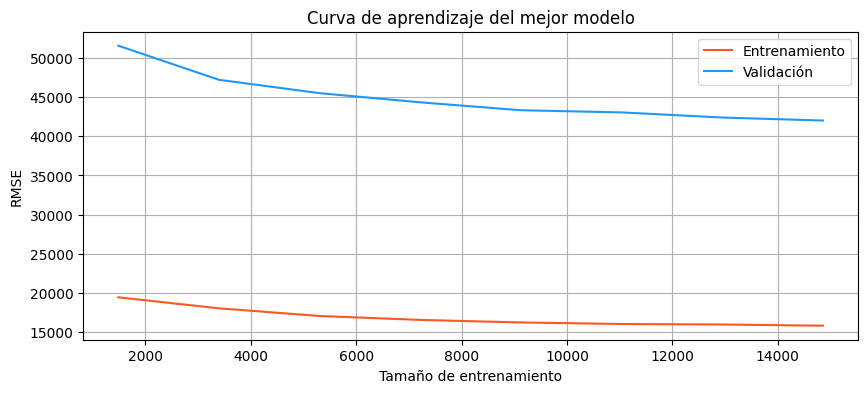

In [88]:
plot_learning_curve(grid_search.best_estimator_, housing, housing_labels, cv=10,
                    title="Curva de aprendizaje del mejor modelo",
                    figsize=(10,4))

5. Aplicar técnicas de regularización. Si bien RandomForestRegressor no posee una regularizaión explícita como sí lo tiene un regresor lienal (con ridge/lasso) podríamos ajustar hiperparámetros como `max_depth`, `min_samples_split`, `min_samples_leaf`, etc. De esta manera buscamos reducir el sobreajuste (*overfitting*) y mejorar la capacidad de generalización del modelo.
6. Aplicar transformaciones más avanzadas a las características, como PCA, t-SNE, UMAP, etc.

#### **<font color="#540094">📊 8.1 BIAS/VARIANCE Trade-Off</font>**

Cuando trabajamos con modelos de Machine Learning, es importante entender el concepto de *bias/variance tradeoff*. Este concepto se refiere al equilibrio entre el sesgo (*bias*), la varianza (*variance*) y el error irreducible en un modelo de Machine Learning.

El **sesgo** se refiere a la capacidad del modelo para capturar la relación entre las características y la variable objetivo. Un modelo con alto sesgo tiende a ser demasiado simple y no captura adecuadamente la complejidad de los datos, lo que puede llevar a un bajo rendimiento en los datos de entrenamiento y prueba, es decir al **underfitting**.

La **varianza**, por otro lado, se refiere a la sensibilidad del modelo a las fluctuaciones en los datos de entrenamiento. Un modelo con alta varianza tiende a ajustarse demasiado a los datos de entrenamiento, capturando el ruido y las fluctuaciones aleatorias en lugar de la verdadera relación subyacente. Esto puede llevar a un buen rendimiento en los datos de entrenamiento, pero a un mal rendimiento en los datos de testeo, es decir al **overfitting**.

Finalmente, el **error irreducible** es el error que no puede ser eliminado por ningún modelo, ya que se debe a factores externos como el ruido en los datos o la variabilidad inherente en el proceso que genera los datos.

En general, aumentar la compllejidad del modelo tiende a incrementar la varianza y reducir el sesgo, mientras que reducir la complejidad del modelo tiende a incrementar el sesgo y reducir la varianza. El objetivo es encontrar un equilibrio adecuado (**Trade-Off**) entre el sesgo y la varianza para minimizar el error total del modelo.

---